<a href="https://colab.research.google.com/github/Imtry100/Encryptix/blob/main/Iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies

In [27]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
#Loading data set
data=pd.read_csv('/content/IRIS.csv')

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Histograms of all features

<Axes: >

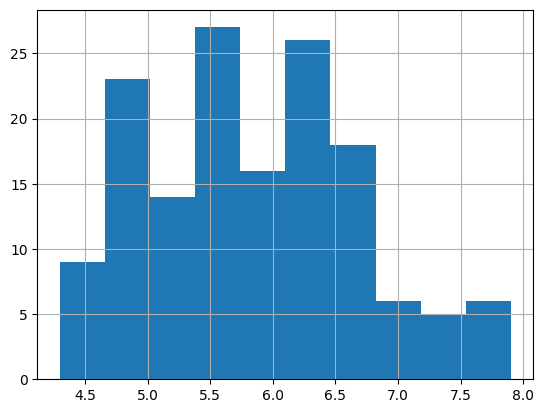

In [8]:
data['sepal_length'].hist()

<Axes: >

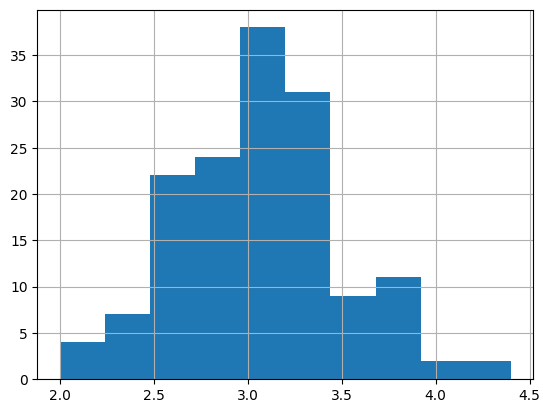

In [9]:
data['sepal_width'].hist()

<Axes: >

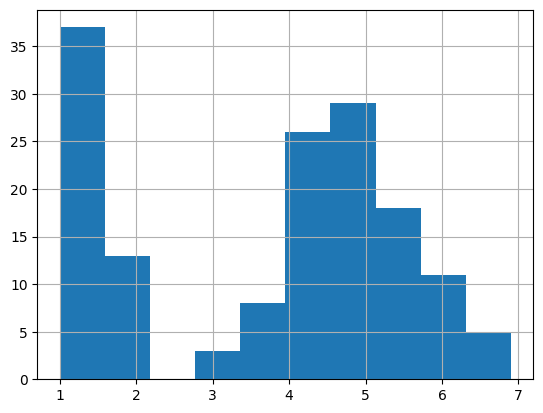

In [10]:
data['petal_length'].hist()

<Axes: >

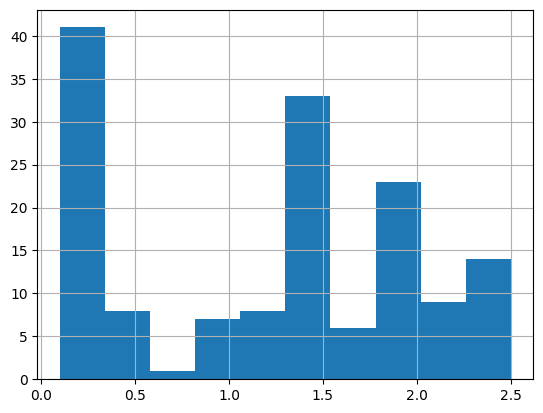

In [11]:
data['petal_width'].hist()

In [12]:
#scatterplot
colors=['orange','blue','green']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

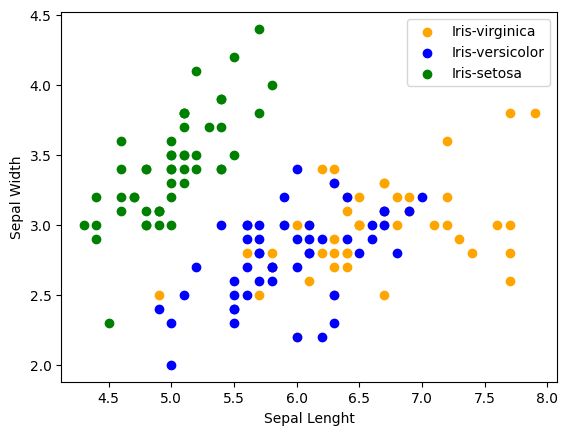

In [13]:
for i in range(3):
  x=data[data['species']==species[i]]
  plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])
  plt.xlabel("Sepal Lenght")
  plt.ylabel("Sepal Width")
  plt.legend()

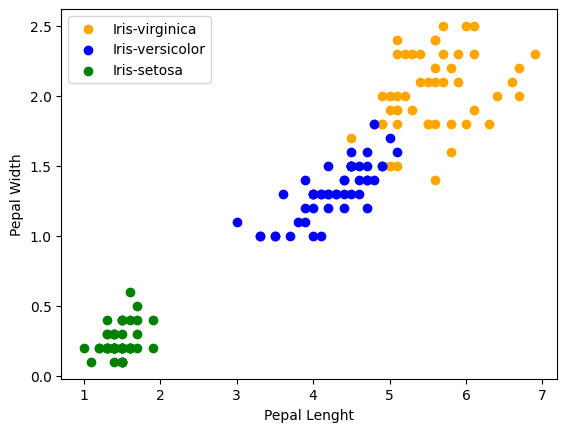

In [14]:
for i in range(3):
  x=data[data['species']==species[i]]
  plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])
  plt.xlabel("Pepal Lenght")
  plt.ylabel("Pepal Width")
  plt.legend()

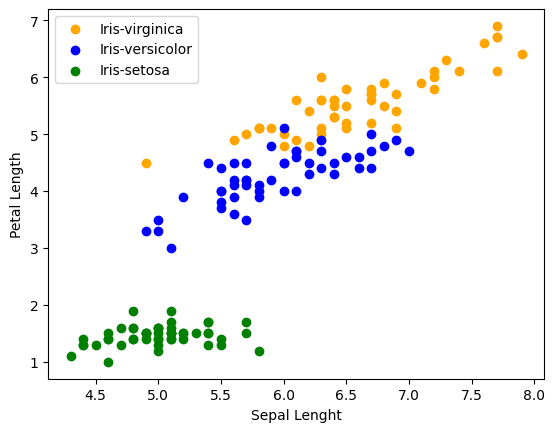

In [15]:
for i in range(3):
  x=data[data['species']==species[i]]
  plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])
  plt.xlabel("Sepal Lenght")
  plt.ylabel("Petal Length")
  plt.legend()

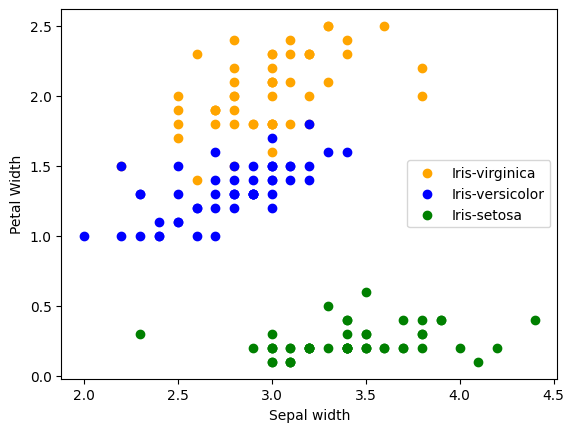

In [16]:
for i in range(3):
  x=data[data['species']==species[i]]
  plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])
  plt.xlabel("Sepal width")
  plt.ylabel("Petal Width")
  plt.legend()

<Axes: >

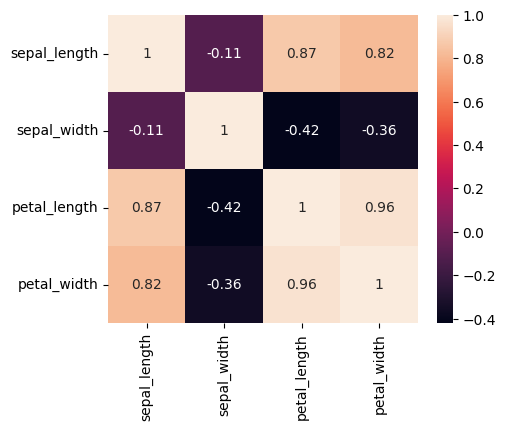

In [17]:
correlation=data.select_dtypes(include=['number']).corr()
fid, ax=plt.subplots(figsize=(5,4))
sns.heatmap(correlation, annot=True, ax=ax)

In [19]:
#Machine mainly understand numbers, so we have to change names to number
label=LabelEncoder()
data['species']=label.fit_transform(data['species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
x=data.drop(columns=['species'])
y=data['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [24]:
classify=LogisticRegression()
classify.fit(x_train,y_train)

LogisticRegression()

In [28]:
#checking accuracy
train=classify.predict(x_train)
acc=accuracy_score(train,y_train)
print("Accuracy on trained model is :", acc)

Accuracy on trained model is : 0.975


In [31]:
rtrain=classify.predict(x_test)
racc=accuracy_score(rtrain,y_test)
print("Accuracy on training model :", racc)

Accuracy on training model : 0.9666666666666667


In [32]:
#As accuracy on training and testing data is almost same, means our model is working fine